# SVR Model

In [21]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load and PreProcess 

In [22]:
loaded = np.load('data/pems08.npz')
sets = loaded.f.data
print(sets.shape)

(17856, 170, 3)


In [23]:
def get_data(road, features):
    datax = sets[:,0,:features]
    if road <=170:
        for k in range(1,road):
            datax = np.concatenate((datax ,sets[:,k,:features]))
    return datax

In [24]:
dataOG = get_data(1,2)
print(dataOG.shape)

(17856, 2)


In [25]:
# Split the data into training and testing sets
train_size = int(len(dataOG) * 0.8)
test_size = len(dataOG) - train_size
traindata, test_data =  dataOG[0:train_size,:], dataOG[train_size:len(dataOG),:]


In [26]:
print(len(traindata), len(test_data))

14284 3572


In [27]:
X_train , y_train = traindata[:,1] , traindata[:,0] 
X_test, y_test =  test_data[:,1], test_data[:,0]

In [28]:
print(len(X_train),len(y_train))

14284 14284


In [29]:
regressor = SVR(kernel="poly", C=40, gamma="auto",epsilon=0.5 ,degree=3, coef0=30)

In [30]:
regressor.fit(X_train.reshape(-1,1),y_train)

SVR(C=40, coef0=30, epsilon=0.5, gamma='auto', kernel='poly')

In [31]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [32]:
# Calculate root mean squared error
rmse = sqrt(mean_squared_error(y_test,y_pred=y_pred))

r2s = r2_score(y_true=y_test,y_pred=y_pred)

print('Test RMSE: %.2f' % rmse)
print('Test R2: %.2f' % r2s)

Test RMSE: 47.53
Test R2: 0.88


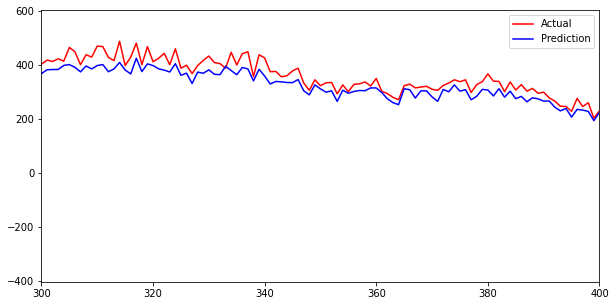

In [33]:
plt.figure(figsize=(10,5))
plt.plot(y_test,color = 'red',label = 'Actual')
plt.plot(y_pred,color = 'blue',label = 'Prediction')
plt.legend()
plt.xlim(300,400)
plt.show()

In [64]:
# Split the data into training and testing sets
train_size = int(len(dataOG) * 0.8)
test_size = len(dataOG) - train_size
train_data_scaled, test_data_scaled = dataOG[0:train_size,:], dataOG[train_size:len(dataOG),:]

In [65]:
scalered = MinMaxScaler(feature_range=(0, 1))
trainX = train_data_scaled[:,1]
trainX = scalered.fit_transform(trainX.reshape(-1,1))
testX = test_data_scaled[:,1]
testX = scalered.fit_transform(testX.reshape(-1,1))

In [66]:
X_trains, Y_trains  = trainX , train_data_scaled[:,0]
X_tests , Y_tests =  testX, test_data_scaled[:,0]

In [72]:

# Creating the SVR model with linear kernel
regressor1 = SVR(kernel="poly", C=50, gamma="auto",epsilon=0.5 ,degree=3, coef0=20)
# Fitting the model on the training data
regressor1.fit(X_trains, Y_trains)


SVR(C=50, coef0=20, epsilon=0.5, gamma='auto', kernel='poly')

In [73]:

# Predicting the values of Y for the testing data
Y_preds = regressor1.predict(X_tests)

r2_scaled = r2_score(Y_tests, Y_preds)
# Calculate root mean squared error
rmse_scaled = sqrt(mean_squared_error(Y_tests,y_pred=Y_preds))
print(r2_scaled, rmse_scaled)

0.856251532261757 52.70140827760712


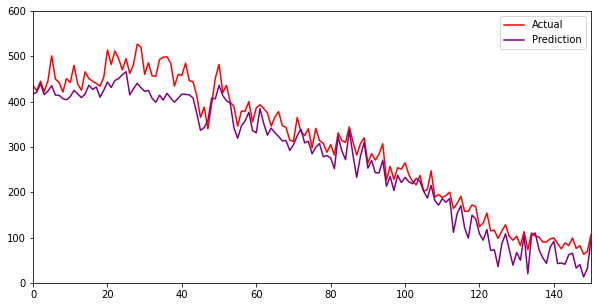

In [75]:
plt.figure(figsize=(10,5))
plt.plot(Y_tests,color = 'red',label = 'Actual')
plt.plot(Y_preds,color = 'purple',label = 'Prediction')
plt.legend()
plt.xlim(0,150)
plt.ylim(0,600)
plt.show()